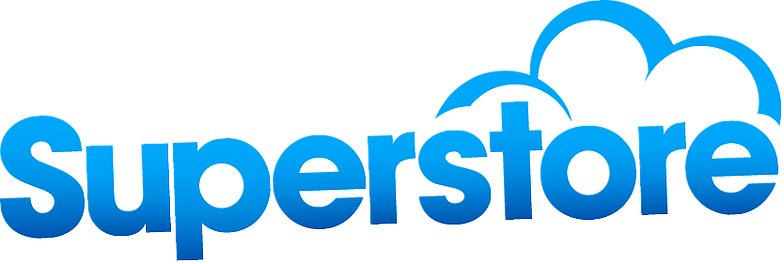

# **Entrenando un Algoritmo de Machine Learning**


**Nombre:** Leandro Montes Catari.

**Comisión:** 46320 - Data Science.

**Tutor:** Ernesto Surijon Frimis.

## **Abstracto con motivación y audiencia**

Este conjunto de datos `Super Sales Store` contiene datos de aproximadamente 10.000 registros de venta de una tienda en Estados Unidos en un periodo determinado. El conjunto de datos incluye datos categóricos de productos, clientes, tipos de envío y datos demográficos de los clientes. Las variables numéricas más importantes son el monto de las ventas, las ganancias, la cantidad de producto y los descuentos.

Este análisis de datos puede resultar de gran utilidad para una variedad de audiencias, incluidos gerentes y propietarios de tiendas minoristas que deseen comprender mejor el rendimiento de sus productos y clientes. También puede ser de interés para analistas de mercado que buscan identificar tendencias de compra y preferencias de los clientes. Además, los especialistas en logística y gestión de inventarios podrían beneficiarse al identificar patrones de demanda y optimizar las estrategias de almacenamiento y distribución.

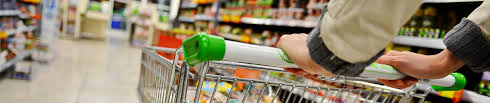

✅ **Objetivo**

El objetivo principal de esta investigación es descubrir información procesable a partir de datos de ventas que puedan ayudar a la tiendan a tomar decisiones. El análisis se centrará en comprender el comportamiento de los clientes, las tendencias de ventas y el desempeño regional para identificar oportunidades de mejora y maximización de ventas y ganancias.


✅ **Contexto Empresarial**

La empresa enfrenta el desafío de aumentar las ventas, adquirir nuevos clientes y expandirse a nuevos mercados para seguir siendo competitiva y lograr un crecimiento sostenible.


✅ **Problema Comercial**

La empresa necesita identificar áreas de mejora en sus estrategias de ventas, orientación a clientes y expansión regional para maximizar la rentabilidad. Por lo que analizaremos a fondo los datos y con ayuda de las visualizaciones podremos dar respuesta a las preguntas que se nos vayan presentando.


✅ **Contexto Analitico**

Esta investigación empleará técnicas de análisis datos para extraer información significativa del conjunto de datos. Los hallazgos se utilizarán para informar decisiones comerciales e impulsar iniciativas de crecimiento estratégico.


✅ **Diccionario**


`Row ID` = ID único para cada fila.

`Order ID` = ID de pedido único para cada Cliente.

`Order Date` = Fecha de pedido del producto.

`Ship Date` = Fecha de Envío del Producto.

`Ship Mode` = Modo de Envío especificado por el Cliente.

`Customer ID` = ID único para identificar a cada Cliente.

`Customer Name` = Nombre del Cliente.

`Segment` = El segmento al que pertenece el Cliente.

`Country` = País de residencia del Cliente.

`City` = Ciudad de residencia del Cliente.

`State` = Estado de residencia del Cliente.

`Postal Code` = Código Postal de cada Cliente.

`Region` = Región a la que pertenece el Cliente.

`Product ID` = ID único del Producto.

`Category` = Categoría del producto solicitado.

`Sub-Category` = Subcategoría del producto solicitado.

`Product Name` = Nombre del Producto.

`Sales` = Ventas del Producto.

`Quantity` = Cantidad del Producto.

`Discount` = Descuento proporcionado.

`Profit` = Beneficio.

##**Preguntas / Hipotesis**

En base a entregas anteriores y para complementar el estudio se realizan las siguientes preguntas, que se iran respondiendo en el desarrollo de este estudio.

1. ¿Cómo han cambiado las ventas con el tiempo?
2. ¿Qué regiones están obteniendo buenos resultados y cuáles necesitan mejorar en términos de ventas?
3. ¿Qué segmentos de clientes son más propensos a comprar en cada región?
4. ¿Qué categoría de productos genera las mayores ingresos y ganancias?

##**Importación de Librerias y Lectura de Archivo .CSV**

In [77]:
pip install catboost #instalamos CatBoost para poder importar CatBoostRegressor

In [78]:
# Importamos librerias que estaremos usando
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from ctypes import alignment
from plotly.subplots import make_subplots
import seaborn as sns
import warnings
%matplotlib inline
import missingno as msno
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
#from sklearn.linear_model import LassoLars
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from mlxtend.plotting import plot_confusion_matrix

In [79]:
# Conectamos google colab al drive.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [80]:
# Leemos el Archivo .csv
data = pd.read_csv('/content/gdrive/MyDrive/Colab-Notebooks/Superstore Sales/Superstore.csv', encoding='windows-1254')

## **Analisis Exploratorio de los Datos (EDA)**

In [81]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%m/%d/%Y')
data['Year'] = data['Order Date'].dt.year #creamos nueva columna año
data["Month"] = pd.DatetimeIndex(data["Order Date"]).month
data["Month Name"] = data["Order Date"].dt.month_name()

In [82]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Month Name
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,November
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,November
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,June
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,October
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,October


In [83]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year',
       'Month', 'Month Name'],
      dtype='object')

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [85]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Year,Month
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896,2015.722233,7.809686
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108,1.123555,3.284654
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,2014.000000,1.000000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,2015.000000,5.000000
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500,2016.000000,9.000000
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,2017.000000,11.000000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,2017.000000,12.000000


In [86]:
data.shape

(9994, 24)

## **Limpieza**

**Analisis de Duplicados**

In [87]:
#Verificamos si tenemos valores que se duplicados.
(data.duplicated().sum())
print(f'Contamos con un total de {data.duplicated().sum()} valores duplicados')

Contamos con un total de 0 valores duplicados


**Analisis de Nulos**

In [88]:
#Verificamos si contamos con datos nulos en el dataset
print(data.isna().sum())
print(f'Contamos con un total de {data.isnull().sum().sum()/data.shape[0] * 100} valores NaN')

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Year             0
Month            0
Month Name       0
dtype: int64
Contamos con un total de 0.0 valores NaN


<Axes: >

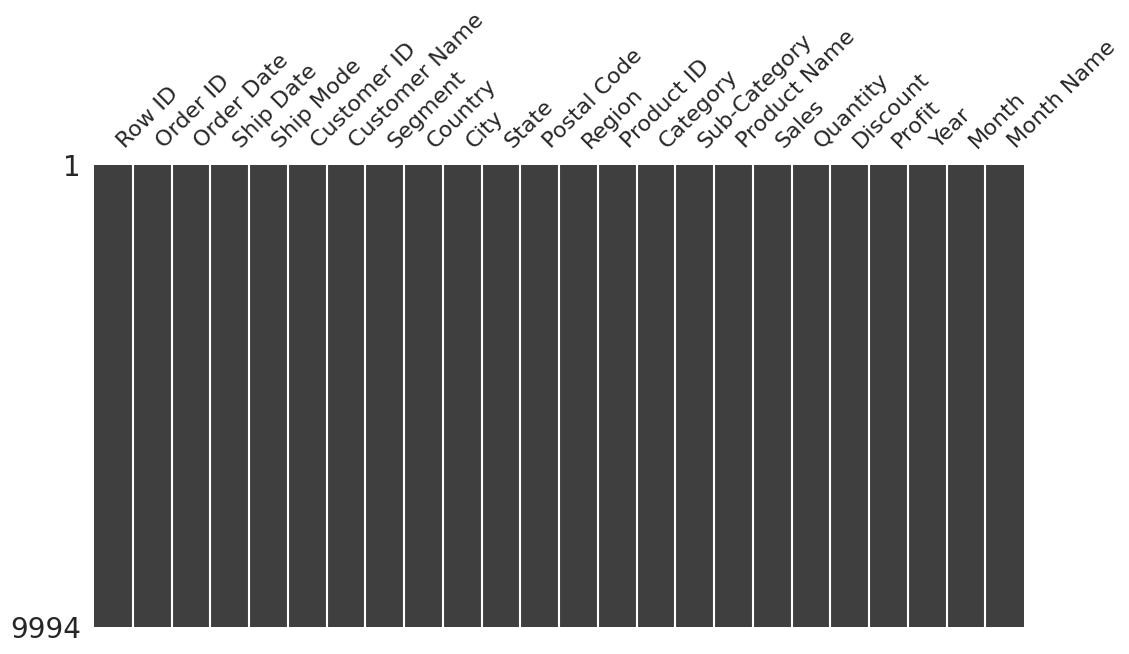

In [89]:
fig, ax = plt.subplots(figsize=(12, 6))
msno.matrix(data, ax=ax)
#plt.show()

##**Analisis, Visualizaciones y StoryTelling**

In [90]:
sales = go.Box(x=data['Sales'],name='Sales ')
Quantity = go.Box(x=data['Quantity'],name='Quantity ')
Profit = go.Box(x=data['Profit'],name='Profit ')
Discount = go.Box(x=data['Discount'],name='Discount ')

fig = make_subplots(rows=2, cols=2)
fig.append_trace(sales, row = 1, col = 1)
fig.append_trace(Quantity, row = 1, col = 2)
fig.append_trace(Profit, row = 2, col = 1)
fig.append_trace(Discount, row = 2, col = 2)
fig.update_layout(height=600, width=1100, title_text = 'Distribución de los datos numericos', title_font_size = 24, title_x=0.45)
fig.show()

Podemos apreciar que tenemos bastantes outliers en nuestra variable objetivo `Sales` y en `Profit` estos los estaremos reduciendo mas adelante.

In [91]:
ship_mode = go.Histogram(x=data["Ship Mode"],name="Ship Mode")
segment = go.Histogram(x=data["Segment"],name="Segment")
Region = go.Histogram(x=data["Region"],name="Region")
category = go.Histogram(x=data["Category"],name="Category")

fig = make_subplots(rows=2, cols=2)
fig.append_trace(ship_mode, row = 1, col = 1)
fig.append_trace(segment, row = 1, col = 2)
fig.append_trace(Region, row = 2, col = 1)
fig.append_trace(category, row = 2, col = 2)
fig.update_layout(height=600, width=1100,title_text = 'Numero de ocurrencias en los datos Categoricos', title_font_size = 24, title_x=0.45)
fig.show()

*   **Categorias con mayores ocurrencias.**
    *   Ship Mode: `Standar Class`
    *   Segment: `Consumer`
    *   Region: `West` seguida muy de cerca por `East`
    *   Category: `Office Supplies`


*   **Categorias con menores ocurrencias.**
    *   Ship Mode: `Same Day`
    *   Segment: `Home Office`
    *   Region: `South`
    *   Category: `Technology`

In [92]:
yearSales = data.groupby('Year')[['Sales','Profit']].sum().reset_index()
fig = px.line(yearSales, x='Year', y=['Sales', 'Profit'], title='Distribución de Ventas/Ganancias por Año')
fig .update_layout(title_x=0.45,height=600, width=1100,title_font=dict(size=24, family="Arial", color="black"))
fig.show()

Pregunta 1. ¿Cómo han cambiado las ventas con el tiempo?

Respuesta, para los datos que estamos analizando podemos notar que a traves de los años las ventas han aumentado desde su inicio en el 2014, por lo que podemos suponer que su tendencia seguira en alza para los proximos años (Despues del 2017).

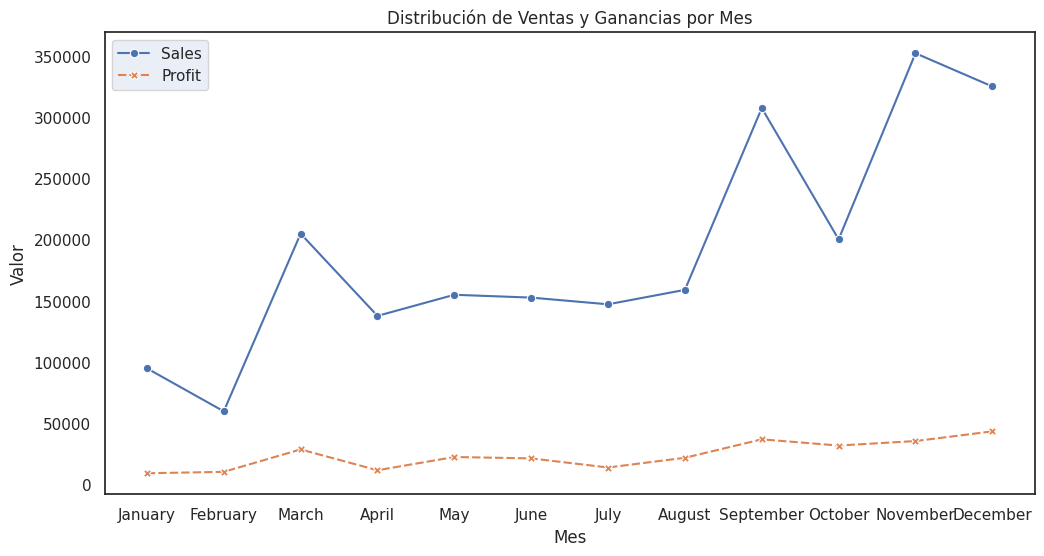

In [93]:
monthSales = data[["Sales","Profit","Month Name"]].groupby(by="Month Name").sum()
ordenar = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] #Ordenar por Nombre del mes
monthSalesOrd = monthSales.reindex(ordenar, axis=0)
plt.figure(figsize=(12,6))
plt.title("Distribución de Ventas y Ganancias por Mes")
sns.set_style("whitegrid", {"axes.facecolor": "#E5ECF6", "grid.color": "white"})
a = sns.lineplot(data=monthSalesOrd, markers=True, legend=True)
a.set_xlabel("Mes")
a.set_ylabel("Valor")
plt.show()

Para complementar la respuesta de la pregunta 1, en esta grafica podemos notar que los mejores meses de venta son `Noviembre` y `Diciembre`, esto se debe quizas a que es temporada decembrina, despues de esto podemos notar la baja los primeros meses `Enero` y `Febrero`.

In [94]:
meanSalesYear = data.groupby('Year')[['Sales']].mean().reset_index()
fig = px.line(meanSalesYear, x='Year', y=['Sales'], title='Media de las Ventas por Año')
fig .update_layout(title_x=0.45,height=600, width=1100,title_font=dict(size=24, family="Arial", color="black"))
fig.show()

Por el grafico podemos notar que la media de las ventas mas alta fue en el año 2014, luego en 2016 intento repuntar pero aun asi no logro superar el maximo historico, en 2017 cae pero hay que considerar que no tenemos los datos completos de este año 2017.

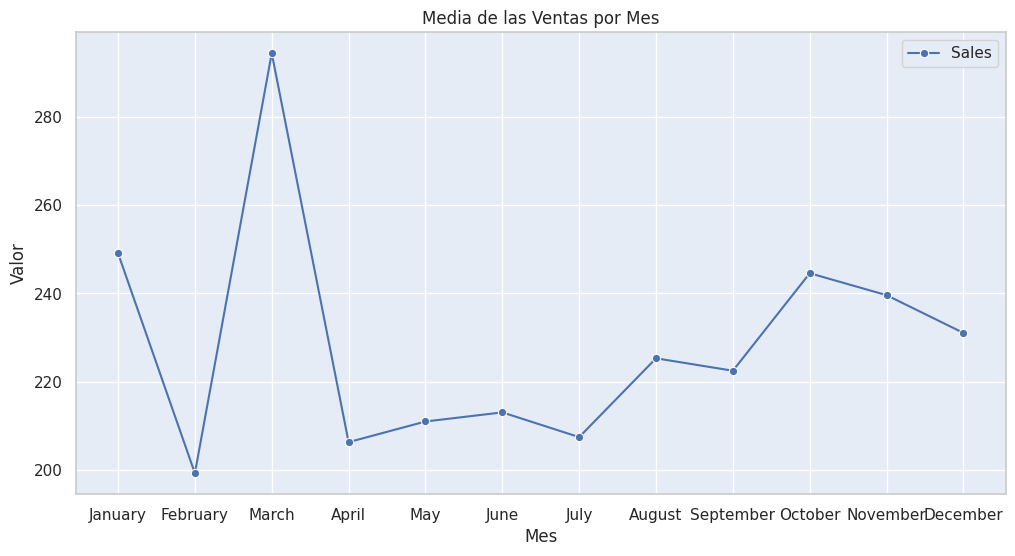

In [95]:
meanSalesMonth = data.groupby('Month Name')[['Sales']].mean()
meanSalesMonth = meanSalesMonth.reindex(ordenar, axis=0)
plt.figure(figsize=(12,6))
a = sns.lineplot(data=meanSalesMonth, markers=True, legend=True)
sns.set_style("whitegrid", {"axes.facecolor": "#E5ECF6", "grid.color": "white"})
a.set_xlabel("Mes")
a.set_ylabel("Valor")
a.set_title("Media de las Ventas por Mes")
plt.show()

Podemos notar que el mes con la media mas alta es en marzo. Despues de ahi su tendencia es al alza pero aun asi no supera su maximo.

In [96]:
medianSalesYear = data.groupby('Year')[['Sales']].median().reset_index()
fig = px.line(medianSalesYear, x='Year', y=['Sales'], title='Mediana de las Ventas por Año')
fig .update_layout(title_x=0.45,height=600, width=1100,title_font=dict(size=24, family="Arial", color="black"))
fig.show()

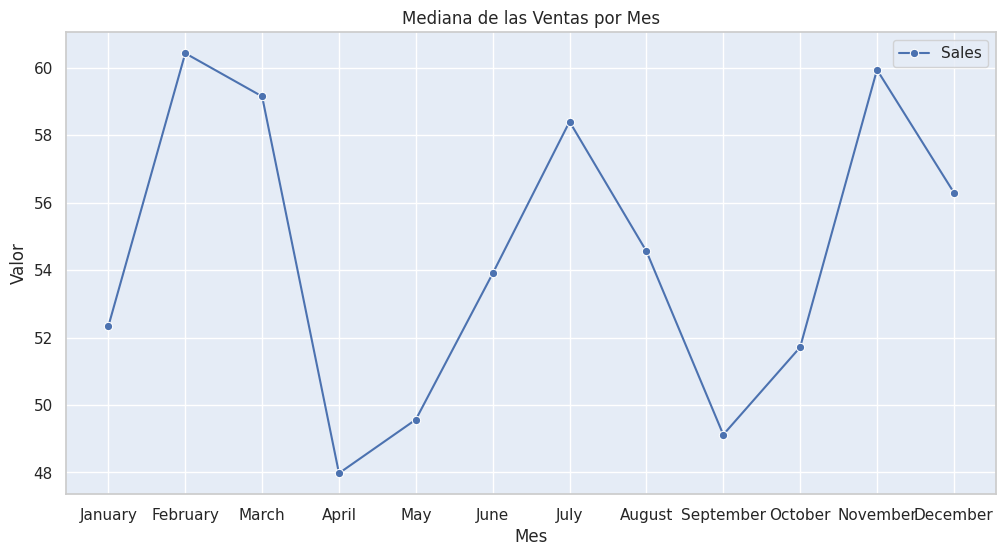

In [97]:
medianSalesMonth = data.groupby('Month Name')[['Sales']].median()
medianSalesMonth = medianSalesMonth.reindex(ordenar, axis=0)
plt.figure(figsize=(12,6))
a = sns.lineplot(data=medianSalesMonth, markers=True, legend=True)
a.set_xlabel("Mes")
a.set_ylabel("Valor")
a.set_title("Mediana de las Ventas por Mes")
sns.set_style("whitegrid", {"axes.facecolor": "#E5ECF6", "grid.color": "white"})
plt.show()

La mediana de las ventas por mes está entre 50 y 60.

In [98]:
salesRegion = data.groupby('Region')['Sales'].sum().reset_index()
fig = px.pie(salesRegion, values='Sales', names='Region', title='Distribución de Ventas por Region', hole=0.4)
fig .update_layout(title_x=0.45,height=600, width=1100,title_font=dict(size=24, family="Arial", color="black"))
fig.update_traces(textposition='inside', textinfo='percent')
fig.show()

Pregunta 2. ¿Qué regiones están obteniendo buenos resultados y cuáles necesitan mejorar en términos de ventas?

Respuesta, en el grafico podemos notar que la region que mejores resultados es la region `West` con un 31.6% del total, esto puede deberse a que es una region prospera y con alto poder adquisitivo. Le sigue la region `East` con un 29.5% que no se queda atras por ser la region mas grande y poblada de EEUU, por lo que es probable que tenga un mayor mercado de ventas. Y por ultimo las regiones que necesitan mejorar en terminos de ventas son region `Central` y `South` que en teoria son regiones mas pequeñas y menos pobladas.

In [99]:
profitRegion = data.groupby('Region')['Profit'].sum().reset_index()
fig = px.pie(profitRegion, values='Profit', names='Region', title='Distribución de Ganancias por Región', hole=0.4)
fig .update_layout(title_x=0.45,height=600, width=1100,title_font=dict(size=24, family="Arial", color="black"))
fig.update_traces(textposition='inside', textinfo='percent')
fig.show()

En cuanto a las ganancias, las regiones mantienen el mismo orden.

In [100]:
salesProfitStates = data.groupby('State')[['Profit', 'Sales']].sum().reset_index()
fig = px.bar(salesProfitStates, x='State', y=['Profit', 'Sales'], title='Profit and Sales by State', barmode='group')
fig.update_layout(xaxis_title='States', yaxis_title='Value', title_x=0.45, height=600, width=1100, title_font=dict(size=24, family="Arial", color="black"))
fig.show()

Para complementar la respuesta de la pregunta 2 podemos confirmar la hipotesis, ya que las mayores ventas y ganancias estan en los estados de `New York` y  `California`. Estados mas prosperos en el pais.

In [101]:
salesCity = data.groupby('City')[['Sales']].sum().reset_index()
salesCity = salesCity.sort_values(by='Sales', ascending=False)
top15 = salesCity.head(15)
fig = px.bar(top15, x=['Sales'], y='City', orientation='h',color='City')
fig.update_layout(title="Top 15 Distribución de Ventas por Ciudad", title_x=0.45, width=1100, title_font=dict(size=24, family="Arial", color="black"))
fig.update_traces(marker_color=px.colors.qualitative.Pastel)
fig.show()

En ese grafico de igual manera podemos confirmar que las mayores ventas estan en los estados de `New York City` y `Los Angeles` como lo habiamos confirmado en las visualizaciones anteriores. Como ciudades que deben mejorar en sus ventas estan las ciudades de `Lafayette`, `Columbia`, `Newark` entre otras que pertenecen a la region `Central` y `South` del pais.

In [102]:
salesProfitSegment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(x=salesProfitSegment['Segment'], y=salesProfitSegment['Sales'], name='Sales'))
fig.add_trace(go.Bar(x=salesProfitSegment['Segment'], y=salesProfitSegment['Profit'], name='Profit'))
fig.update_layout(height=600, width=1100, title='Ventas y Ganancias por Segmento de Cliente', xaxis_title='Segment', yaxis_title='Monto', title_x=0.5, title_font=dict(size=24, family="Arial", color="black"))
fig.show()

Pregunta 3. ¿Qué segmentos de clientes son más propensos a comprar en cada región?

Respuesta, como se puede apreciar en general los clientes mas propensos a comprar son los `Consumer` por ende la mayor cantidad de ganancias se genera por las compras de este segmento de clientes.

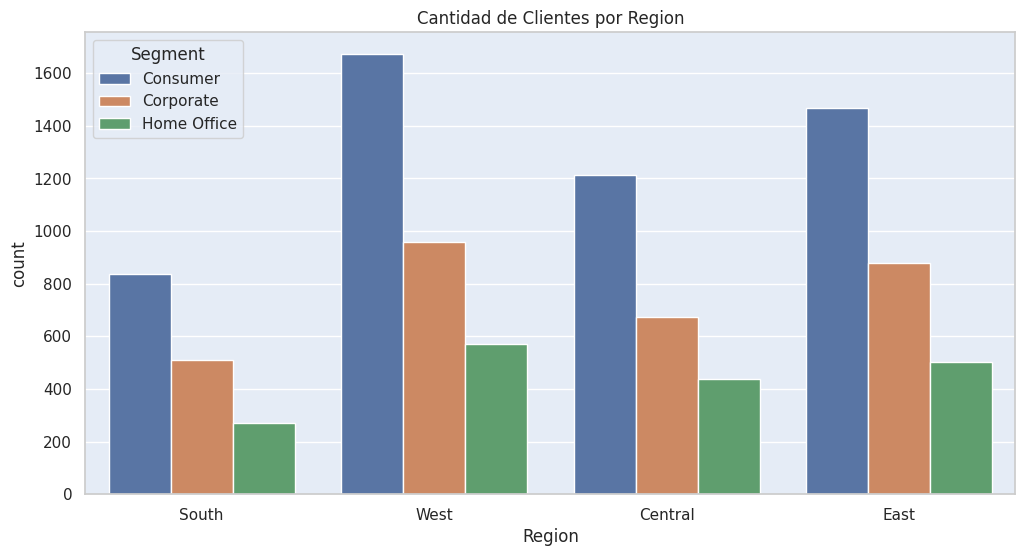

In [103]:
plt.figure(figsize=(12,6))
sns.countplot(data, x='Region', hue='Segment')
sns.set_style("whitegrid", {"axes.facecolor": "#E5ECF6", "grid.color": "white"})
plt.title('Cantidad de Clientes por Region')
plt.show()

Como notamos en el grafico anterior que los clientes mas propensos a comprar son los `Consumer`, pero analizando este grafico podemos confirmar que en todas las regiones la mayor cantidad de clientes son `Consumer`, por lo que se le recomendaria a la organizacion hacer el esfuerzo de captar mas clientes como `Corporate` ya que quizas el monto de las ventas que se le realicen a estas sean mucho mayores, mejorando asi los margenes.

In [104]:
categorySalesProfit = data.groupby('Category')[['Profit','Sales']].sum().reset_index()
fig = px.bar(categorySalesProfit, x='Category', y=['Profit','Sales'], title='Ventas y Ganancias por Categoria', barmode='group')
fig .update_layout(title_x=0.45,height=600, width=1100,title_font=dict(size=24, family="Arial", color="black"))
fig.show()

Pregunta 4. ¿Qué categoría de productos genera las mayores ingresos y ganancias?

Respuesta, como pudimos ver en la distribucion de datos de la columna categoria (mas arriba), la categoria con mayor cantidad de ventas es la de `Office Supplies` y esto se debe a que tiene mayor cantidad de productos. A pesar de que la categoria `Technology` es la que tiene menos productos es la que mayores ingresos y ganancias genera, podria ser porque los articulos electronicos son mucho mas costosos y comerciales.

In [105]:
subCategorySalesProfit = data.groupby('Sub-Category')[['Profit','Sales']].sum().reset_index()
fig = px.bar(subCategorySalesProfit, x='Sub-Category', y=['Profit', 'Sales'], title='Ventas y Ganancias por Sub-Categoria', barmode='group')
fig .update_layout(title_x=0.45, height=600, width=1100,title_font=dict(size=24, family="Arial", color="black"))
fig.show()

Como podemos notar en este grafico y como se comento en el grafico anterior los productos que mas ingresos generan en la categoria technology son los `Phones`, `Machines` y `Copies` estos por ser mas costosos, en cambio el unico producto que deja mayores ingresos en la categoria de Office Supplies es `Binders`. Ojo que el segundo producto mas rentable son las `Chairs` pero esta pertenece a la categoria Furniture.

In [106]:
scatter_plot = px.scatter(data, x='Sub-Category', y='Sales', title='Distribución de Productos por Sub-Categoria', color='Category',)
scatter_plot.update_layout(title_font_family="Arial", title_font_size=24, title_font_color="black", title_x=0.5, height=600, width=1100)
scatter_plot.show()

En este grafico puedo confirmar que productos pertenecen a que Categoria.

**Conclusión**

En base al proposito inicial de esta investigacion y despues de haber analizado y visualizado la distribucion de los datos, despues de haber respondido las preguntas e hipotesis planteadas. Podemos concluir lo siguiente:

Para poder minimizar las perdidas, la tienda deberia de dejar de vender a ciertos estados donde se estan teniendo perdidas, como lo vimos en el grafico de `Ventas / Ganancias por Estado` (Texas, Ohio, Pensylvania o Colorado son los estados con mas perdidas). Tambien se podrian aplicar distintas tecnicas de marketing para tratar de hacer mas rentable la operacion en estos estados.

Dejar de vender productos no rentables o mejorar su precio de venta, aplicar mas descuentos en estos (Tables con mayor perdida de la categoria Furniture).

Por lo tanto las pérdidas se pueden atribuir a los tipos de artículos que se venden a los clientes en estos estados o a que los costos de envío a ciertas áreas son mas costosos y por eso se están reduciendo sus ganancias.

## **Analisis Univariado**

In [107]:
yearSales = data.groupby('Year')['Sales',].sum().reset_index()
fig = px.bar(yearSales, x='Year', y=['Sales'], title='Distribución de Ventas Año')
fig .update_layout(title_x=0.45,height=400, width=800,title_font=dict(size=24, family="Arial", color="black"))
fig.show()

In [108]:
fig = px.bar(meanSalesYear, x='Year', y='Sales', title='Media de las Ventas por Año')
fig.update_layout(title_x=0.45, height=400, width=800, title_font=dict(size=24, family="Arial", color="black"))
fig.show()

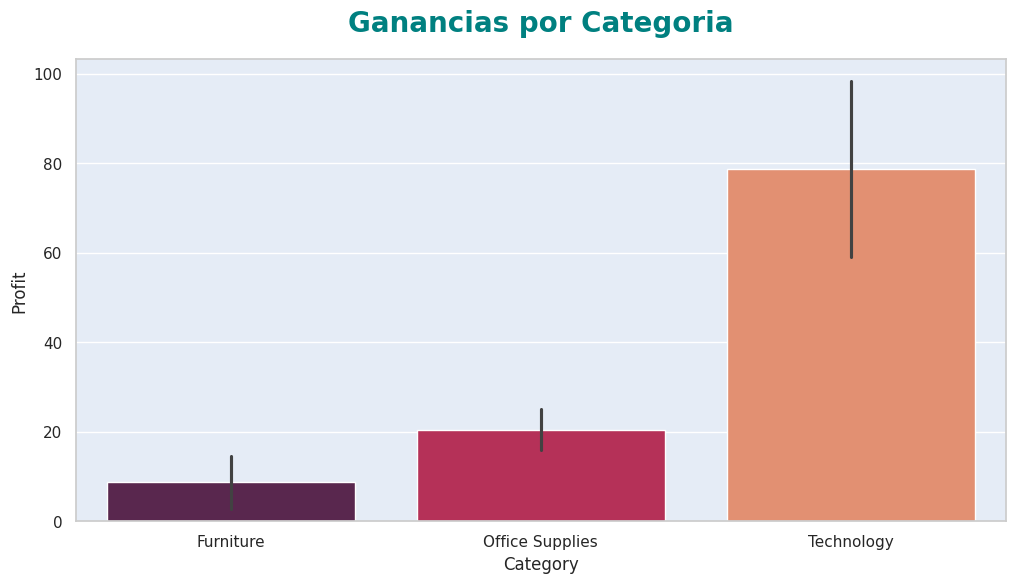

In [109]:
plt.figure(figsize=(12,6))
sns.barplot(x='Category',y='Profit',data=data,palette='rocket')
plt.title('Ganancias por Categoria',pad=20,fontsize=20,fontweight='bold',color='teal')
sns.set_style("whitegrid", {"axes.facecolor": "#E5ECF6", "grid.color": "white"})
plt.show()

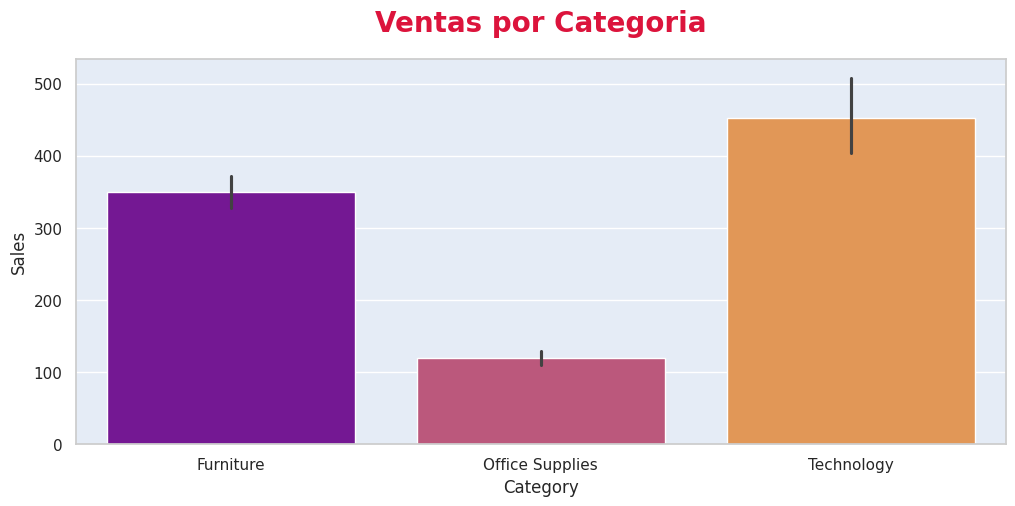

In [110]:
plt.figure(figsize=(12,5))
sns.barplot(x='Category',y='Sales',data=data,palette='plasma')
plt.title('Ventas por Categoria',pad=20,fontsize=20,fontweight='bold',color='crimson')
sns.set_style("whitegrid", {"axes.facecolor": "#E5ECF6", "grid.color": "white"})
plt.show()

##**Analisis Bivariado**

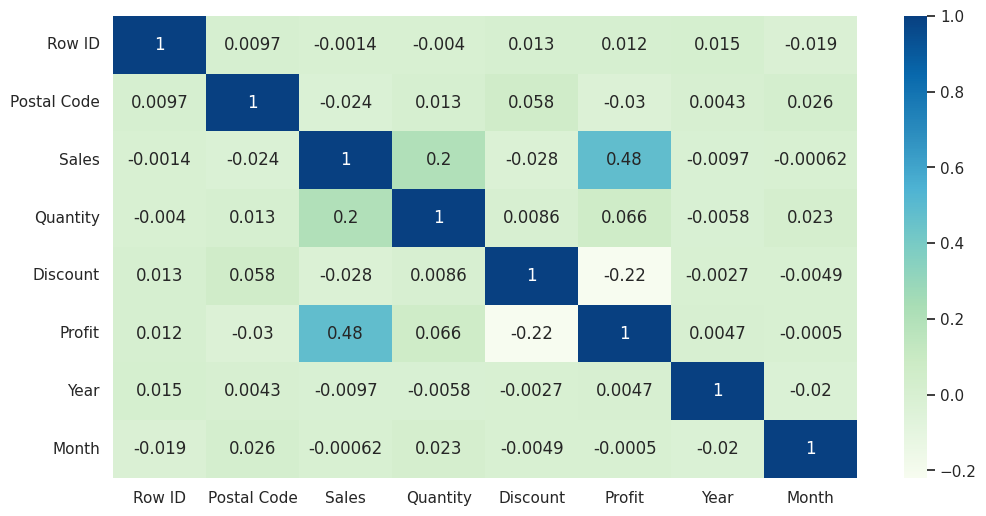

In [111]:
plt.figure(figsize=(12,6))
sns.set_theme(style="white")
corr = data.corr()
heatmap = sns.heatmap(corr, annot=True, cmap = 'GnBu')

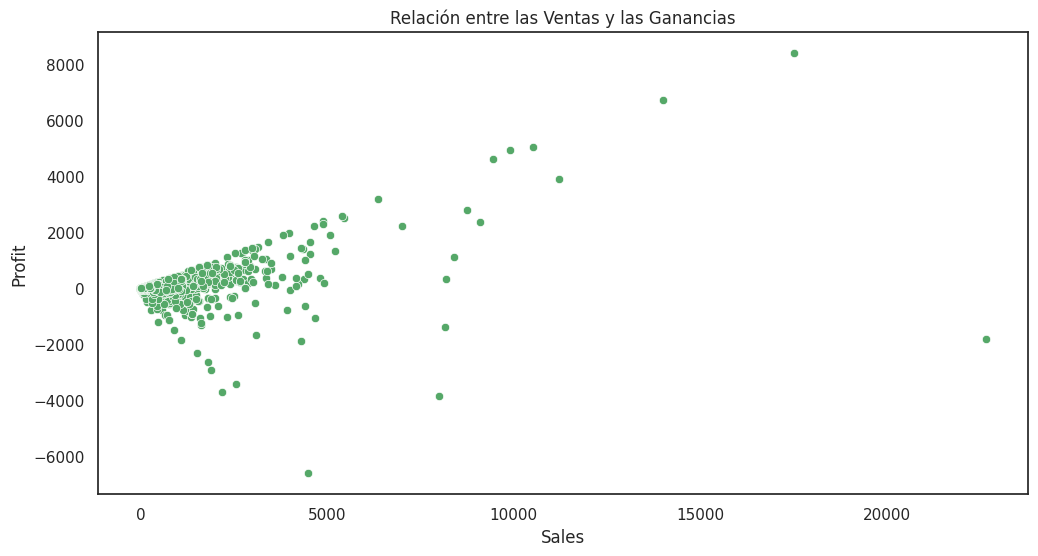

In [112]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data, x='Sales', y='Profit', color='g')
plt.title('Relación entre las Ventas y las Ganancias')
plt.show()

 Existe una relación positiva y fuerte entre las ventas y las ganancias de la tienda. Esto significa que la tienda puede aumentar sus ganancias aumentando sus ventas.

#⚡**Entrenando un Algoritmo de Machine Learning**

##✅**Encoding**

In [113]:
#Convertimos valores categoricos a numericos
le = LabelEncoder()
for i in data.columns:
    if(data.dtypes[i] == 'object'):
        data[i] = le.fit_transform(data[i])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   int64         
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   int64         
 5   Customer ID    9994 non-null   int64         
 6   Customer Name  9994 non-null   int64         
 7   Segment        9994 non-null   int64         
 8   Country        9994 non-null   int64         
 9   City           9994 non-null   int64         
 10  State          9994 non-null   int64         
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   int64         
 13  Product ID     9994 non-null   int64         
 14  Category       9994 non-null   int64         
 15  Sub-Category   9994 n

In [114]:
data.drop(['Row ID', 'Order ID','Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Country', 'Postal Code',
           'Region', 'Product ID', 'Product Name'], axis=1, inplace=True)
data.columns

Index(['Segment', 'City', 'State', 'Category', 'Sub-Category', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Year', 'Month', 'Month Name'],
      dtype='object')

In [115]:
sales = go.Box(x=data['Sales'],name='Sales ')
Profit = go.Box(x=data['Profit'],name='Profit')
fig = make_subplots(rows=1, cols=2)
fig.append_trace(sales, row = 1, col = 1)
fig.append_trace(Profit, row = 1, col = 2)
fig.update_layout(height=400, width=1100, title_text = 'Representación de los Outliers', title_font_size = 24, title_x=0.45)
fig.show()

Trataremos los outliers de `Sales` y `Profit`

In [116]:
print("Antiguos: ", data.shape[0])
data.drop(index= data[(data['Sales'] > 3000)].index, inplace=True)
data.drop(index= data[(data['Profit'] > 1000) | (data['Profit'] < -500)].index, inplace=True)
print("Nuevos: ", data.shape[0])

Antiguos:  9994
Nuevos:  9882


In [117]:
sales = go.Box(x=data['Sales'],name='Sales ')
Profit = go.Box(x=data['Profit'],name='Profit')
fig = make_subplots(rows=1, cols=2)
fig.append_trace(sales, row = 1, col = 1)
fig.append_trace(Profit, row = 1, col = 2)
fig.update_layout(height=400, width=1100, title_text = 'Representación de los Outliers', title_font_size = 24, title_x=0.45)
fig.show()

Ahora el número de Outliers se ha reducido y podemos comenzar a modelar.

In [118]:
data.head()

,Segment,City,State,Category,Sub-Category,Sales,Quantity,Discount,Profit,Year,Month,Month Name
0,0,194,15,0,4,261.9600,2,0.00,41.9136,2016,11,9
1,0,194,15,0,5,731.9400,3,0.00,219.5820,2016,11,9
2,1,266,3,1,10,14.6200,2,0.00,6.8714,2016,6,6
3,0,153,8,0,16,957.5775,5,0.45,-383.0310,2015,10,10
4,0,153,8,1,14,22.3680,2,0.20,2.5164,2015,10,10


##✅**Feature Engineering**

In [119]:
#utilizamos el metodo de Standard Scaler
sc = StandardScaler()
x = data.drop(['Sales'] , axis = 1).values
y =data['Sales'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

##✅**Entrenando Algoritmos**

Siendo `Sales` mi variable objetivo, que es un valor continuo, elegire un algoritmo de regresión.

Primero probaremos con un **Algoritmo de Regresion Lineal**, luego con **CatBoostRegressor** por ultimo **LGBMRegressor** y obtendremos:


✔ `MSE (Mean Squared Error):` Error Cuadrático Medio.

✔ `RMSE (Root Mean Squared Error):` Raíz del Error Cuadrático Medio.

✔ `Reg_score (R-squared):` Coeficiente de Determinación.

✔ `MAPE (Mean Absolute Percentage Error):` Error Absoluto Medio Porcentual.

✔ `MAE (Mean Absolute Error):` Error Absoluto Medio.

☝**Regresion Lineal**

In [120]:
lr = LinearRegression()                                       # Inicializar el modelo de Regresión Lineal
lr.fit(x_train, y_train)                                      # Entrenar el modelo con los datos de entrenamiento

LinearRegression()

Regresion Lineal
0.38511748943441415
0.4803313722532023
MSE: 64499.76654144917
RMSE: 253.96804236251688
Reg_score: 0.4803313722532023
MAPE: 5.999169238452524
MAE: 158.2398354331593


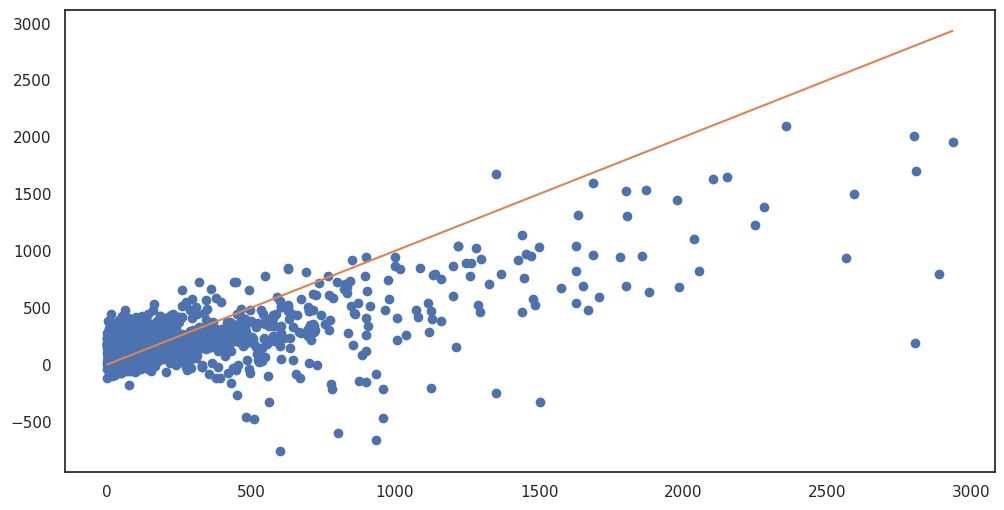

In [121]:
print("Regresion Lineal")
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))
y_pred = lr.predict(x_test)

#Metricas de Evaluacion del modelo.

mse = mean_squared_error(y_test , y_pred)                     # MSE
rmse = np.sqrt(mse)                                           # RMSE
reg_score = r2_score(y_test , y_pred)                         # reg_score
mape = mean_absolute_percentage_error(y_test , y_pred)        # MAPE
mae = mean_absolute_error(y_test , y_pred)                    # MAE

print('MSE:', mse)
print('RMSE:', rmse)
print('Reg_score:', reg_score )
print('MAPE:', mape )
print('MAE:', mae)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()

✅ **Interpretación:**

El `MSE` y `RMSE` son elevados, lo que indica que las predicciones del modelo tienen un error relativamente alto.

El valor de `Reg_score` es bajo, lo que indica que la regresión lineal no explica una parte significativa de la varianza en la variable objetivo.

El `MAPE` es moderado, lo que sugiere que hay una desviacion promedio del 5.99% de los valores reales.

El `MAE` indica que el error promedio en las predicciones es de 158.2398 unidades.

✅ **Conclusiones:**

El modelo de regresión lineal ajustado no parece ser un buen predictor de la variable objetivo.

Hay un error considerable en las predicciones del modelo.

Se necesitan más datos o un modelo diferente para obtener resultados más precisos.

☝ **Cat Boost Regressor**

In [122]:
cat= CatBoostRegressor()                                      # Inicializar el modelo CatBoostRegressor
cat.fit(x_train, y_train)                                     # Entrenar el modelo con los datos de entrenamiento

Learning rate set to 0.056761
0:	learn: 328.1839349	total: 4.23ms	remaining: 4.23s
1:	learn: 317.6339203	total: 6.36ms	remaining: 3.17s
2:	learn: 307.7419224	total: 8.06ms	remaining: 2.68s
3:	learn: 298.1897174	total: 9.68ms	remaining: 2.41s
4:	learn: 288.7830138	total: 11.2ms	remaining: 2.23s
5:	learn: 280.4684214	total: 12.9ms	remaining: 2.13s
6:	learn: 272.1851259	total: 14.4ms	remaining: 2.04s
7:	learn: 264.5911366	total: 16.4ms	remaining: 2.04s
8:	learn: 257.7141922	total: 17.9ms	remaining: 1.97s
9:	learn: 250.9767439	total: 19.5ms	remaining: 1.94s
10:	learn: 244.9808990	total: 21.2ms	remaining: 1.91s
11:	learn: 239.5602744	total: 22.8ms	remaining: 1.88s
12:	learn: 234.5074293	total: 24.5ms	remaining: 1.86s
13:	learn: 229.4500929	total: 26.1ms	remaining: 1.84s
14:	learn: 225.1341731	total: 27.8ms	remaining: 1.83s
15:	learn: 220.1764771	total: 29.5ms	remaining: 1.81s
16:	learn: 215.9149214	total: 30.8ms	remaining: 1.78s
17:	learn: 212.4487871	total: 32.4ms	remaining: 1.77s
18:	lear

CAT
0.9465576153491012
0.8622137054053671
MSE: 17101.636234033616
RMSE: 130.77322445376046
Reg_score: 0.8622137054053671
MAPE: 0.9000882339572204
MAE: 57.817156422685606


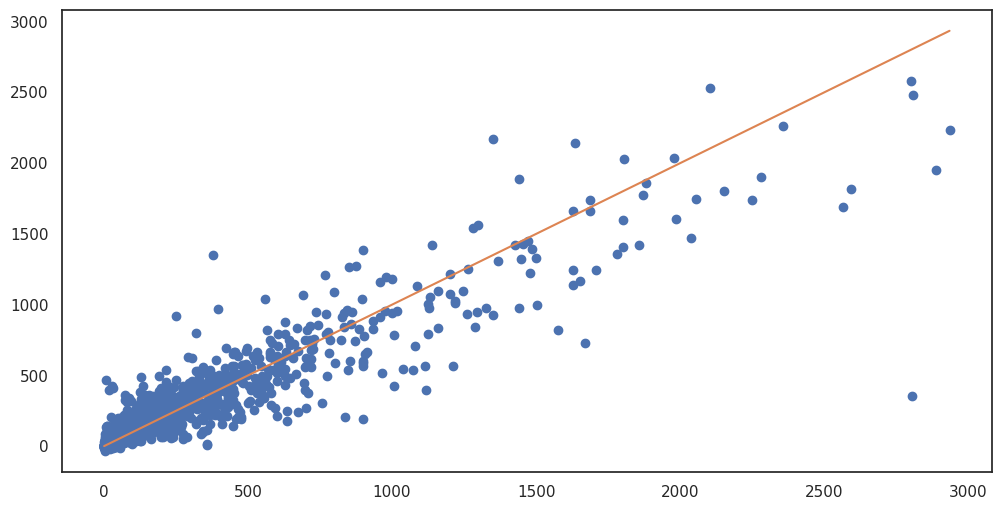

In [123]:
print('CAT')
print(cat.score(x_train,y_train))
print(cat.score(x_test, y_test))
y_pred = cat.predict(x_test)

#Metricas de Evaluacion del modelo.

mse = mean_squared_error(y_test , y_pred)                     # MSE
rmse = np.sqrt(mse)                                           # RMSE
reg_score = r2_score(y_test , y_pred)                         # reg_score
mape = mean_absolute_percentage_error(y_test , y_pred)        # MAPE
mae = mean_absolute_error(y_test , y_pred)                    # MAEr

print('MSE:', mse)
print('RMSE:', rmse)
print('Reg_score:', reg_score )
print('MAPE:', mape )
print('MAE:', mae)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()

✅ **Interpretación:**

El `MSE` y `RMSE` son inferiores al modelo de `Regresión Lineal`.

El valor de `Reg_score` es alto, lo que indica que la regresión `CAT` explica una parte significativa de la varianza en la variable objetivo.

El `MAPE` es moderado, lo que sugiere que hay una desviacion promedio del 0.9% de los valores reales.

El `MAE` indica que el error promedio en las predicciones es de 57.817 unidades.

✅ **Conclusiones:**

El modelo de regresión `CAT` ajustado parece ser el `MEJOR` predictor de la variable objetivo.

Las predicciones del modelo tienen un error relativamente bajo.

No se necesitan más datos o un modelo diferente para obtener resultados más precisos.

☝ **LGMR Regressor**

In [124]:
gbm= LGBMRegressor()                                          # Inicializar el modelo LGBMRegressor
gbm.fit(x_train, y_train)                                     # Entrenar el modelo con los datos de entrenamiento

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 629
[LightGBM] [Info] Number of data points in the train set: 7905, number of used features: 11
[LightGBM] [Info] Start training from score 188.941351


LGBMRegressor()

LightGBM
0.9228893710909888
0.8417782006079353
MSE: 19638.03196433973
RMSE: 140.13576261732666
Reg_score: 0.8417782006079353
MAPE: 1.2220081438035713
MAE: 63.76185246019997


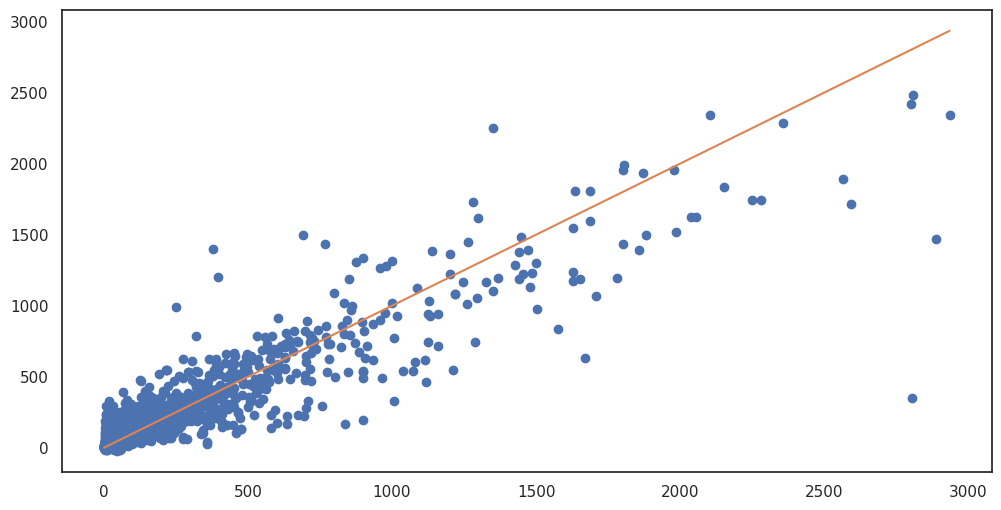

In [125]:
print('LightGBM')
print(gbm.score(x_train,y_train))
print(gbm.score(x_test, y_test))
y_pred = gbm.predict(x_test)

#Metricas de Evaluacion del modelo.

mse = mean_squared_error(y_test , y_pred)                     # MSE
rmse = np.sqrt(mse)                                           # RMSE
reg_score = r2_score(y_test , y_pred)                         # reg_score
mape = mean_absolute_percentage_error(y_test , y_pred)        # MAPE
mae = mean_absolute_error(y_test , y_pred)                    # MAE

print('MSE:', mse)
print('RMSE:', rmse)
print('Reg_score:', reg_score )
print('MAPE:', mape )
print('MAE:', mae)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()

✅ **Interpretación:**

El `MSE` y `RMSE` son inferiores al modelo de `Regresión Lineal` y mayores al modelo `CAT`.

El valor de `Reg_score` es alto, lo que indica que la regresión `LightGBM` explica una parte significativa de la varianza en la variable objetivo.

El `MAPE` es bajo, lo que sugiere que hay una desviacion promedio del 1.22% de los valores reales.

El `MAE` indica que el error promedio en las predicciones es de 63.761 unidades.

✅ **Conclusiones:**

El modelo de regresión LightGBM ajustado parece ser un buen predictor de la variable objetivo.

Las predicciones del modelo tienen un error relativamente bajo.

No se necesitan más datos o un modelo diferente para obtener resultados más precisos.